In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("fake_job_postings.csv")
df.head()   

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [6]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [8]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.shape

(17880, 18)

# Pre-processing

### Feature Selection

In [10]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [11]:
df = df[['title', 'location','company_profile', 'requirements', 'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function','salary_range',
       'fraudulent']]

### Check for missing values and outliers

In [12]:
df.isna().apply(pd.value_counts)

,title,location,company_profile,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,salary_range,fraudulent
False,17880.0,17534,14572,15185,17880.0,17880.0,17880.0,14409,10830,9775,12977,11425,2868,17880.0
True,NaN,346,3308,2695,NaN,NaN,NaN,3471,7050,8105,4903,6455,15012,NaN


In [13]:
df.isnull().sum()

title                      0
location                 346
company_profile         3308
requirements            2695
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
salary_range           15012
fraudulent                 0
dtype: int64

In [14]:
df.duplicated().sum()

493

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()

0

In [17]:
df_num = df[['telecommuting','has_company_logo','has_questions','fraudulent','salary_range']]
df_cat = df[['title', 'location','company_profile', 'requirements','employment_type',
       'required_experience', 'required_education', 'industry', 'function']]

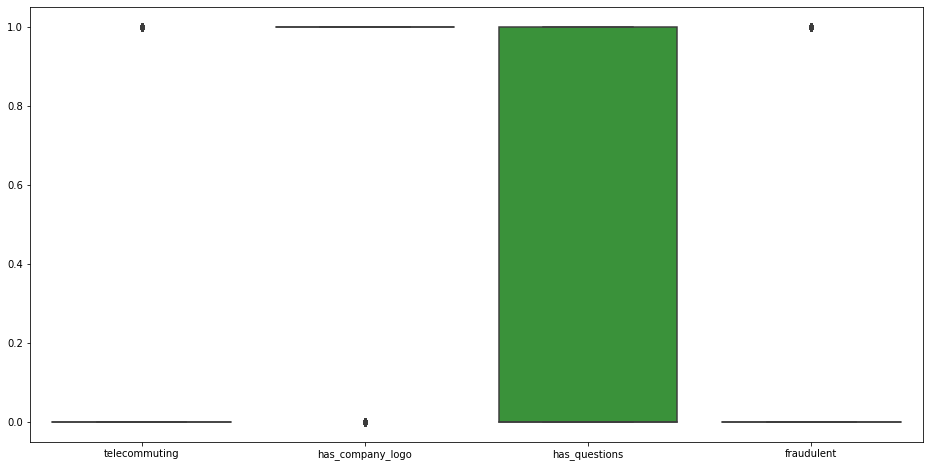

In [18]:
plt.figure(figsize=[16,8])
sb.boxplot(data = df_num)
plt.show()

- Columns 'telecommuting', 'has_company_logo' ,'fradulent' has minimal outliers.

## Removing Outliers

In [19]:
df_num = df_num[df_num['telecommuting'] < 0.9 ]
df_num = df_num[df_num['fraudulent'] < 0.9 ]
df_num = df_num[df_num['has_company_logo'] > 0.1 ]
df_num

,telecommuting,has_company_logo,has_questions,fraudulent,salary_range
0,0,1,0,0,NaN
1,0,1,0,0,NaN
2,0,1,0,0,NaN
3,0,1,0,0,NaN
4,0,1,1,0,NaN
...,...,...,...,...,...
17872,0,1,0,0,NaN
17873,0,1,0,0,NaN
17875,0,1,1,0,NaN
17876,0,1,1,0,NaN


In [20]:
df.isnull().sum()

title                      0
location                 340
company_profile         3255
requirements            2549
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3397
required_experience     6858
required_education      7889
industry                4769
function                6261
salary_range           14580
fraudulent                 0
dtype: int64

In [21]:
df.dropna(axis= 0, how= 'any', inplace=True)

In [22]:
df.isnull().sum()

title                  0
location               0
company_profile        0
requirements           0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
salary_range           0
fraudulent             0
dtype: int64

In [23]:
df.shape

(1485, 14)

- Outliers and missing values has been removed.

## Getting insights from data

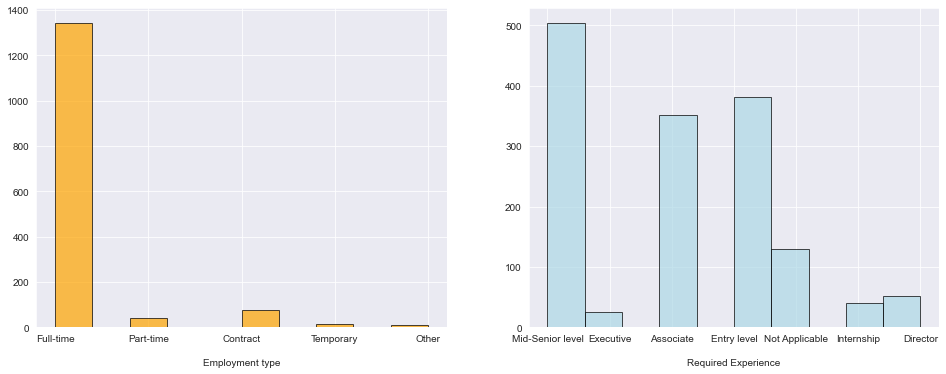

In [31]:
plt.figure(figsize= (25,20))
plt.subplot(3,3,1)
plt.hist(df.employment_type, color='orange', edgecolor = 'black', alpha = 0.7)
plt.xlabel('\nEmployment type')

plt.subplot(3,3,2)
plt.hist(df.required_experience, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('\nRequired Experience')


plt.show()

### Full time job opportunities (Not fraud)

In [26]:
df_jobs = df[(df['employment_type'] == 'Full-time') & (df['fraudulent']== 0)]

In [27]:
df_jobs.shape

(1269, 14)

In [28]:
df_jobs['title'].value_counts()

Agent-Inbound Sales Position                               12
Customer Service Representative                             8
Marketing Manager                                           8
Account Manager                                             7
Technical Support Associate                                 7
                                                           ..
Digital Marketing Activator                                 1
Production Planner                                          1
Office Manager/ Executive Assistant                         1
Communication and Engagement Administrator                  1
No Mad Men... Mostly Happy People - Management Training     1
Name: title, Length: 1027, dtype: int64

In [29]:
df_jobs['title'].value_counts().max()

12

- 'Agent-Inbound Sales Position' has 12 opportunities for a full time job.

### Industry having the max no. of fake job postings

In [32]:
df_industry = df[df['fraudulent']== 1]

In [33]:
df_industry.shape

(82, 14)

In [34]:
df_industry['industry'].value_counts()

Oil & Energy                            19
Real Estate                             10
Consumer Services                        8
Financial Services                       6
Computer & Network Security              5
Retail                                   4
Management Consulting                    3
Accounting                               2
Transportation/Trucking/Railroad         2
Hospitality                              2
Hospital & Health Care                   2
Insurance                                2
Telecommunications                       2
Human Resources                          2
Biotechnology                            2
Mechanical or Industrial Engineering     1
Security and Investigations              1
Construction                             1
Defense & Space                          1
Computer Networking                      1
Media Production                         1
Warehousing                              1
Logistics and Supply Chain               1
Military   

- Industry with, maximum no. of fake job postings : Oil & energy
                   

## Balancing dataset

In [35]:
df['fraudulent'].value_counts()

0    1403
1      82
Name: fraudulent, dtype: int64

In [36]:
df['fraudulent'].values

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [37]:
fraud = df[df['fraudulent']== 1]
fraud.shape

(82, 14)

In [38]:
not_fraud = df[df['fraudulent']== 0]
not_fraud.shape

(1403, 14)

In [51]:
fraud = fraud.sample(1403, replace=True)

In [52]:
fraud.shape, not_fraud.shape

((1403, 14), (1403, 14))

###### Now our dataset is balanced

In [53]:
df = fraud.append(not_fraud)
df.reset_index()

,index,title,location,company_profile,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,salary_range,fraudulent
0,17672,Data Entry Clerk,"US, TX, AUSTIN",As the industry’s largest supply contracting c...,High school diploma or equivalent is required,0,1,1,Full-time,Entry level,High School or equivalent,Consumer Services,Customer Service,23000-28000,1
1,8488,UTC Lead Testing Technician,"US, CA, Bakersfield",Jaco Oil and Refined Resources have partnered ...,Responsibilities &amp; Position Requirements: ...,0,1,1,Full-time,Mid-Senior level,Certification,Oil & Energy,Other,65000-80000,1
2,16860,Process Validation Project Manager,"US, NC, RTP",Maynard Consulting Company has more than 20 ye...,10+ years’ experience in high-speed automated ...,0,1,1,Contract,Mid-Senior level,Bachelor's Degree,Biotechnology,Engineering,60000-100000,1
3,6333,Sales Professional- Mid Market,"US, MD, Baltimore",Making Mobile Device Management Clear is Clear...,Job Requirements High School Diploma or GEDPas...,0,1,0,Part-time,Entry level,High School or equivalent,Computer & Network Security,Sales,21600-31200,1
4,740,Health + Safety Professional,"US, CA, Bakersfield",...,Duties and Responsibilities:Provides safety po...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Oil & Energy,Other,80000-120000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2801,17439,Senior Trusts Manager,"GB, LND, Kingston upon Thames",VSO brings people together to fight poverty by...,The applicantVSO is looking for an individual ...,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,International Trade and Development,Business Development,39000-41000,0
2802,17488,Management Accountant,"NZ, N, Auckland",PowerbyProxi and its customers are leading a r...,"Reporting to the CFO, the Management Accountan...",0,1,0,Contract,Mid-Senior level,Bachelor's Degree,Electrical/Electronic Manufacturing,Finance,100000-110000,0
2803,17515,Marketing manager,"GR, B, Thessaloniki",A vacation rental platform that will re-invent...,Perfect use of English and Greek language. Soc...,0,1,0,Part-time,Associate,Bachelor's Degree,"Leisure, Travel & Tourism",Marketing,5000-7000,0
2804,17849,Communication Designer,"US, CA, San Francisco",Balanced Labs exists to provide accountants an...,"Specifically, we’re looking for:5+ years of vi...",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Design,80000-100000,0


In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
le = LabelEncoder()
df['title'] = le.fit_transform(df['title'])
df['location'] = le.fit_transform(df['location'])
df['company_profile'] = le.fit_transform(df['company_profile'])
df['requirements'] = le.fit_transform(df['requirements'])
df['employment_type'] = le.fit_transform(df['employment_type'])
df['required_experience'] = le.fit_transform(df['required_experience'])
df['required_education'] = le.fit_transform(df['required_education'])
df['industry'] = le.fit_transform(df['industry'])
df['function'] = le.fit_transform(df['function'])
df['salary_range'] = le.fit_transform(df['salary_range'])

In [56]:
df = df.reset_index()
df.head()

,index,title,location,company_profile,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,salary_range,fraudulent
0,17672,254,391,48,537,0,1,1,1,2,4,20,7,203,1
1,8488,1135,229,192,893,0,1,1,1,5,2,62,23,431,1
2,16860,778,335,227,54,0,1,1,0,5,1,6,12,411,1
3,6333,913,317,222,575,0,1,0,3,2,4,12,31,194,1
4,740,485,229,438,395,0,1,1,1,5,1,62,23,467,1


### Split dataset into training and testing

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X = df[['index', 'title', 'location', 'company_profile', 'requirements',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'salary_range']].values
Y = df[['fraudulent']].values

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.30)

In [63]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1964, 14), (842, 14), (1964, 1), (842, 1))

### 1) Logistic Regression

#### Train the model:

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
LgR = LogisticRegression()

In [66]:
LgR.fit(X_train, Y_train)

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

#### Test the Model:

In [67]:
Y_pred = LgR.predict(X_test)

In [68]:
Y_test = Y_test.flatten()
Y_pred = Y_pred.flatten()

In [69]:
Y_test.shape, Y_pred.shape

((842,), (842,))

In [70]:
df_lgr = pd.DataFrame({'Y_test': Y_test , 'Y_pred': Y_pred}) 
df_lgr

,Y_test,Y_pred
0,0,1
1,0,0
2,1,1
3,1,1
4,0,0
...,...,...
837,1,1
838,0,0
839,0,0
840,1,1


#### Check Accuracy Score :

In [71]:
from sklearn.metrics import accuracy_score

In [72]:
accuracy_score(Y_pred, Y_test)

0.7054631828978623

### Accuracy using Logostic Regression Algorithm : 68%

************************************

### 2) K Nearest Neighbors

#### Train the Model:

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
knn = KNeighborsClassifier()

In [75]:
knn.fit(X_train,Y_train)

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier()

#### Test the Model:

In [76]:
Y_pred = knn.predict(X_test)

In [77]:
Y_test = Y_test.flatten()
Y_pred = Y_pred.flatten()

In [78]:
df_knn = pd.DataFrame({'Y_test': Y_test , 'Y_pred': Y_pred}) 
df_knn

,Y_test,Y_pred
0,0,0
1,0,0
2,1,1
3,1,1
4,0,0
...,...,...
837,1,1
838,0,0
839,0,0
840,1,1


#### Check Accuracy Score :

In [79]:
accuracy_score(Y_pred,Y_test)

0.9334916864608076

### Accuracy using K Nearest Neighbors Algorithm : 93.7% =~ 94%

******************************************

### 3) Random Forest Algorithm

#### Train the Model:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=5)

In [ ]:
rfc.fit(X_train, Y_train)

#### Test the Model:

In [ ]:
Y_pred = rfc.predict(X_test)

In [ ]:
Y_test = Y_test.flatten()
Y_pred = Y_pred.flatten()

In [ ]:
df_rfc = pd.DataFrame({'Y_test': Y_test , 'Y_pred': Y_pred}) 
df_rfc

#### Check Accuracy Score:

In [ ]:
accuracy_score(Y_pred,Y_test)

### Accuracy using Random Forest Classification Algorithm : 99.8%

##### --> As per accuracy scores, Random forest algorithm has highest accuracy score, that's why for given dataset 'Random Forest' algorithm is best suitable to use.